# Taro's STATSM148 Notebook

### I. Data Cleaning and Feature Engineering

In [14]:
import pandas as pd
import numpy as np
from random import sample, seed

# Import initial data
data = pd.read_csv('../smaller_sample.csv')
event_defs = pd.read_csv('../event_definitions.csv')

In [11]:
# Take subset of customers
seed(1234)
SUBSET_PERCENT = 0.05
unique_customers = data.customer_id.unique().tolist()
sample_size = int(len(unique_customers) * SUBSET_PERCENT)
customer_sample = sample(unique_customers, sample_size)

data = data[data['customer_id'].isin(customer_sample)]

In [15]:
data.head()

,customer_id,account_id,stage,ed_id,event_name,event_timestamp,journey_steps_until_end,journey_id,milestone_number
0,278713037.0,-1812321640,Discover,2,campaign_click,2021-05-31 06:00:00,1,1.0,NaN
1,278713037.0,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:03,2,1.0,NaN
2,278713037.0,-1812321640,Apply for Credit,3,application_web_submit,2021-05-31 23:11:51,3,1.0,NaN
3,278713037.0,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:51,4,1.0,NaN
4,278713037.0,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:51,5,1.0,NaN


In [16]:
df = data.drop_duplicates(subset=['event_timestamp'])
df = df.reset_index(drop=True) # re-indexing

In [18]:
df.head(20)

,customer_id,account_id,stage,ed_id,event_name,event_timestamp,journey_steps_until_end,journey_id,milestone_number
0,2.787130e+08,-1812321640,Discover,2,campaign_click,2021-05-31 06:00:00,1,1.0,NaN
1,2.787130e+08,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:03,2,1.0,NaN
2,2.787130e+08,-1812321640,Apply for Credit,3,application_web_submit,2021-05-31 23:11:51,3,1.0,NaN
3,2.787130e+08,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:54,6,1.0,NaN
4,2.787130e+08,-1812321640,Apply for Credit,3,application_web_submit,2021-05-31 23:12:37,7,1.0,NaN
5,2.787130e+08,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:12:40,9,1.0,NaN
6,2.787130e+08,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:12:41,11,1.0,NaN
7,2.787130e+08,-1812321640,Apply for Credit,3,application_web_submit,2021-05-31 23:12:53,12,1.0,NaN
8,2.787130e+08,-1812321640,Apply for Credit,12,application_web_approved,2021-05-31 23:13:02,15,1.0,1.0
9,2.787130e+08,-1812321640,NaN,1,promotion_created,2021-07-08 07:05:14.253,16,NaN,NaN


In [19]:
from utils import fingerhut_data_cleaner
cleaned_df = fingerhut_data_cleaner(df, event_defs)

In [20]:
cleaned_df.head(20)

,customer_id,account_id,ed_id,event_name,event_timestamp,ed_id,journey_steps_until_end,stage
0,2.787130e+08,-1812321640,2,campaign_click,2021-05-31 06:00:00,2,1,Discover
1,2.787130e+08,-1812321640,19,application_web_view,2021-05-31 23:11:03,19,2,Apply for Credit
2,2.787130e+08,-1812321640,3,application_web_submit,2021-05-31 23:11:51,3,3,Apply for Credit
3,2.787130e+08,-1812321640,19,application_web_view,2021-05-31 23:11:54,19,4,Apply for Credit
4,2.787130e+08,-1812321640,3,application_web_submit,2021-05-31 23:12:37,3,5,Apply for Credit
5,2.787130e+08,-1812321640,19,application_web_view,2021-05-31 23:12:40,19,6,Apply for Credit
6,2.787130e+08,-1812321640,19,application_web_view,2021-05-31 23:12:41,19,7,Apply for Credit
7,2.787130e+08,-1812321640,3,application_web_submit,2021-05-31 23:12:53,3,8,Apply for Credit
8,2.787130e+08,-1812321640,12,application_web_approved,2021-05-31 23:13:02,12,9,Apply for Credit
9,2.787130e+08,-1812321640,1,promotion_created,2021-07-08 07:05:14.253,1,1,NaN


Below this is my original data cleaning / eda. 

In [8]:
# Merge export.csv with event_definitions.csv
merged = pd.merge(data, event_defs, left_on='ed_id', right_on='event_definition_id', how='inner')

In [9]:
# Drop duplicate rows
merged.drop_duplicates(subset=['event_timestamp'], inplace=True)

In [10]:
merged.shape

(9562931, 11)

In [11]:
# Convert timestamps to datetime
merged['event_timestamp'] = pd.to_datetime(merged['event_timestamp'])

In [12]:
# Drop duplicate columns
merged = merged.drop(['event_name_x', 'event_definition_id'], axis=1)

In [13]:
# Notice how there are more account ids than customer ids
# Indicates that each customer can have multiple accounts
print('There are ' + str(merged.customer_id.nunique()) + ' unique customer ids.')
print('There are ' + str(merged.account_id.nunique()) + ' unique account ids.')

There are 415419 unique customer ids.
There are 432798 unique account ids.


In [14]:
# Organize dataset by customer
merged = merged.sort_values(by='customer_id')

In [15]:
# Add n_accounts column to represent the number of accounts each customer has
account_counts = merged.groupby('customer_id').size().reset_index(name='n_accounts')

merged_with_counts = pd.merge(merged, account_counts, on='customer_id')

In [16]:
# The distribution of n_accounts per customer (kinda crazy!)
merged_with_counts.groupby('customer_id')['n_accounts'].mean().describe()

count    415419.000000
mean         23.019965
std          36.220113
min           1.000000
25%           4.000000
50%          12.000000
75%          28.000000
max        2373.000000
Name: n_accounts, dtype: float64

In [17]:
# The customer with the most accounts info:
merged_with_counts.iloc[merged_with_counts['n_accounts'].idxmax(), ]

customer_id                              -1473683489
account_id                                 108595545
ed_id                                              6
event_timestamp            2021-11-24 23:10:33+00:00
journey_steps_until_end                         1131
event_name_y                          begin_checkout
journey_id                                         1
milestone_number                                 NaN
stage                                 First Purchase
n_accounts                                      2373
Name: 1507349, dtype: object

In [18]:
# We want to study how the Discover phase affects success rates
# To do this, we first need to identify customers that have gone through this phase
discover_customers = merged_with_counts.groupby('customer_id')['stage'].apply(lambda x: 'Discover' in x.values).reset_index(name='has_discover')

merged_with_counts = pd.merge(merged_with_counts, discover_customers, on='customer_id')

In [17]:
# There are 56,386,082 rows in this dataset
# 35,232,911 (a little over half) have gone through the Discover phase
# This doesn't mean over half of customers have gone through Discover, since customers have varying numbers of rows.
merged_with_counts.has_discover.sum()

35232911

In [19]:
# We can repeat this for the 'First Purchase' stage to show which customers have made a purchase
first_purchase_customers = merged_with_counts.groupby('customer_id')['stage'].apply(lambda x: 'First Purchase' in x.values).reset_index(name='has_first_purchase')

merged_with_counts = pd.merge(merged_with_counts, first_purchase_customers, on='customer_id')

In [21]:
# Variable that shows the entire lifespan (time) of a customer
earliest_timestamps = merged_with_counts.groupby('customer_id')['event_timestamp'].min()
latest_timestamps = merged_with_counts.groupby('customer_id')['event_timestamp'].max()
customer_lifespan = latest_timestamps - earliest_timestamps
merged_with_counts = merged_with_counts.merge(customer_lifespan.rename('lifespan'), on='customer_id', how='left')

In [22]:
# Also want to create a variable that shows how long it takes each customer to make their first purchase
first_purchase_timestamps = merged_with_counts[merged_with_counts['stage'] == 'First Purchase'].groupby('customer_id')['event_timestamp'].min()
time_delta = first_purchase_timestamps - earliest_timestamps
merged_with_counts = merged_with_counts.merge(time_delta.rename('time_delta'), on='customer_id', how='left')

In [23]:
# Organizational
merged_with_counts.rename(columns={'event_name_y':'event_name', 'time_delta':'time_to_purchase'}, inplace=True)

In [24]:
# Save 
merged_with_counts.to_csv('subset.csv')

In [25]:
merged_with_counts.head()

,customer_id,account_id,ed_id,event_timestamp,journey_steps_until_end,event_name,journey_id,milestone_number,stage,n_accounts,has_discover,has_first_purchase,lifespan,time_to_purchase
0,-2147474305,1098145658,6,2021-11-28 22:27:11+00:00,1,begin_checkout,1,NaN,First Purchase,17,False,True,0 days 00:18:07,0 days
1,-2147474305,1098145658,19,2021-11-28 22:28:06+00:00,2,application_web_view,1,NaN,Apply for Credit,17,False,True,0 days 00:18:07,0 days
2,-2147474305,1098145658,19,2021-11-28 22:28:10+00:00,3,application_web_view,1,NaN,Apply for Credit,17,False,True,0 days 00:18:07,0 days
3,-2147474305,1098145658,19,2021-11-28 22:28:24+00:00,4,application_web_view,1,NaN,Apply for Credit,17,False,True,0 days 00:18:07,0 days
4,-2147474305,1098145658,4,2021-11-28 22:31:07+00:00,11,browse_products,1,NaN,First Purchase,17,False,True,0 days 00:18:07,0 days


In [26]:
# Delete excess variables
del merged, data, account_counts, discover_customers, first_purchase_customers, customer_lifespan, earliest_timestamps, first_purchase_timestamps, latest_timestamps, time_delta, unique_customers

### II. Exploratory Data Analysis

In [1]:
# Kernel died so I gotta reload the dataset
#! IGNORE IF KERNEL DID NOT CRASH
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataframe
merged_with_counts = pd.read_csv('subset.csv')

# Drop the 'Unnamed: 0' column
merged_with_counts = merged_with_counts.drop('Unnamed: 0', axis=1)

# Convert 'event_timestamp' to datetime
merged_with_counts['event_timestamp'] = pd.to_datetime(merged_with_counts['event_timestamp'], format='mixed')

# Convert lifespan and time_to_purchase to days
for col in ['lifespan', 'time_to_purchase']:
    merged_with_counts[col] = pd.to_timedelta(merged_with_counts[col])

In [2]:
merged_with_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9562931 entries, 0 to 9562930
Data columns (total 14 columns):
 #   Column                   Dtype              
---  ------                   -----              
 0   customer_id              int64              
 1   account_id               int64              
 2   ed_id                    int64              
 3   event_timestamp          datetime64[ns, UTC]
 4   journey_steps_until_end  int64              
 5   event_name               object             
 6   journey_id               int64              
 7   milestone_number         float64            
 8   stage                    object             
 9   n_accounts               int64              
 10  has_discover             bool               
 11  has_first_purchase       bool               
 12  lifespan                 timedelta64[ns]    
 13  time_to_purchase         timedelta64[ns]    
dtypes: bool(2), datetime64[ns, UTC](1), float64(1), int64(6), object(2), timedelta64[n

In [ ]:
# Convert 'lifespan' from timedelta to number of days if not already done
merged_with_counts['lifespan_days'] = merged_with_counts['lifespan'].dt.days

# Group by 'customer_id' and aggregate the data
agg_functions = {'has_discover': 'max', 'has_first_purchase': 'max', 'lifespan_days': 'max'}  # or use 'mean' for lifespan_days
customer_merged_with_counts = merged_with_counts.groupby('customer_id').agg(agg_functions).reset_index()

In [4]:
# Create the plot
plt.figure(figsize=(12, 6))
g = sns.catplot(data=customer_merged_with_counts, x='has_first_purchase', y='lifespan_days', col='has_discover', kind='swarm', height=4, aspect=1)

# Renaming the axes
g.set_axis_labels("Has Made First Purchase", "Customer Lifespan")
g.fig.suptitle('Lifespan by First Purchase and Discover Status')

# Adjust layout for the title
plt.subplots_adjust(top=0.9)

# Save the plot to a file
g.savefig("lifespan_by_purchase_and_discover_swarm.png")

plt.show()

KeyboardInterrupt: 

<Figure size 1200x600 with 0 Axes>

In [30]:
plt.figure(figsize=(12, 6))

merged_with_counts['lifespan_days'] = merged_with_counts['lifespan'].dt.days

# Create a catplot with swarm plots
g = sns.catplot(data=merged_with_counts, x='has_first_purchase', y='lifespan_days', col='has_discover', kind='violin', height=4, aspect=1)

# Renaming the axes
g.set_axis_labels("Has Made First Purchase", "Customer Lifespan (Days)")
g.fig.suptitle('Lifespan by First Purchase and Discover Status')

# Adjust layout for the title
plt.subplots_adjust(top=0.9)

# Save the plot to a file
g.savefig("lifespan_by_purchase_and_discover_violin.png")

plt.show()

KeyboardInterrupt: 

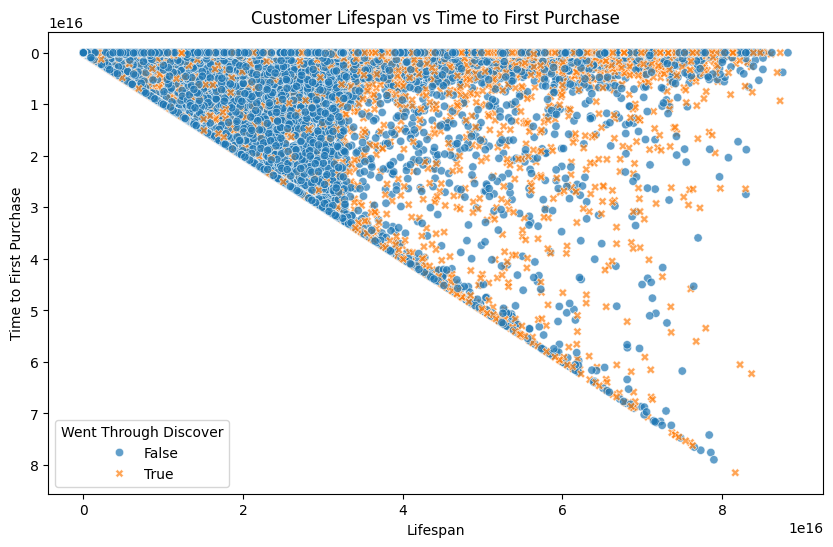

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
grouped_df = merged_with_counts.groupby('customer_id').first()

# Filter out rows where 'time_to_purchase' is NaN
filtered_df = grouped_df.dropna(subset=['time_to_purchase'])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='lifespan', y='time_to_purchase', hue='has_discover', style='has_discover', alpha=0.7)

plt.title('Customer Lifespan vs Time to First Purchase')
plt.xlabel('Lifespan')
plt.ylabel('Time to First Purchase')
plt.legend(title='Went Through Discover')
plt.show()

C:\Users\Polar\AppData\Local\Temp\ipykernel_12864\290251786.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['lifespan'].dt.days, label=f'has_discover={has_disc}, has_first_purchase={has_fp}', shade=True)
C:\Users\Polar\AppData\Local\Temp\ipykernel_12864\290251786.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['lifespan'].dt.days, label=f'has_discover={has_disc}, has_first_purchase={has_fp}', shade=True)
C:\Users\Polar\AppData\Local\Temp\ipykernel_12864\290251786.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['lifespan'].dt.days, label=f'has_discover={has_disc}, has_first_purchase={has_f

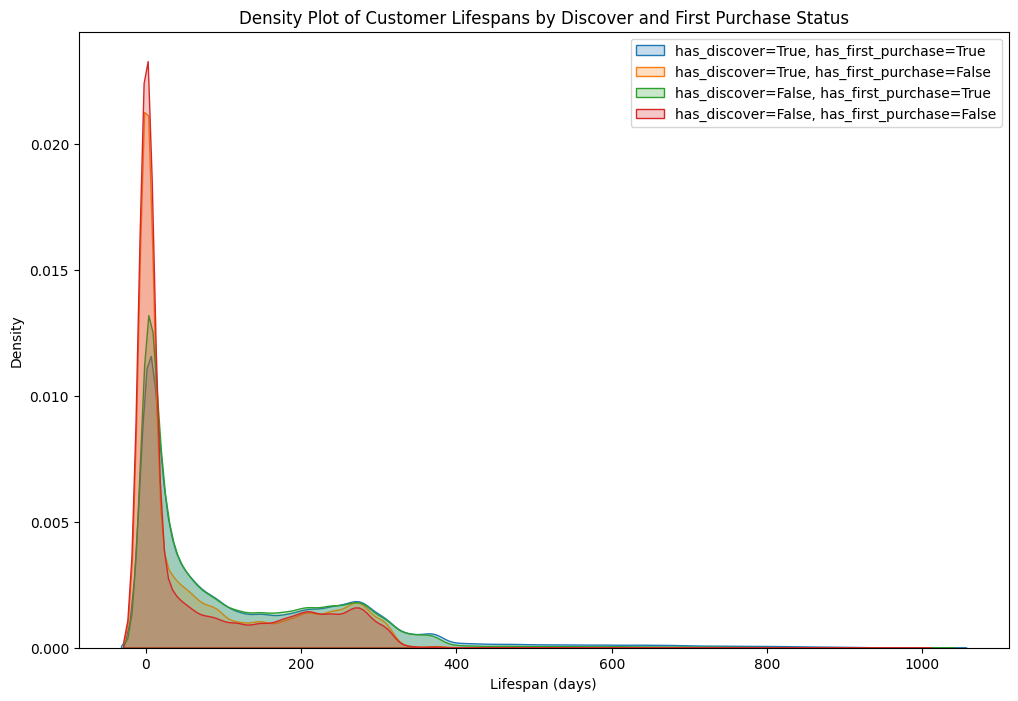

In [43]:
plt.figure(figsize=(12, 8))

for has_disc in [True, False]:
    for has_fp in [True, False]:
        subset = grouped_df[(grouped_df['has_discover'] == has_disc) & (grouped_df['has_first_purchase'] == has_fp)]
        # Convert 'lifespan' to a numeric value such as days for plotting
        sns.kdeplot(subset['lifespan'].dt.days, label=f'has_discover={has_disc}, has_first_purchase={has_fp}', fill=True)

plt.title('Density Plot of Customer Lifespans by Discover and First Purchase Status')
plt.xlabel('Lifespan (days)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [45]:
del has_disc, has_fp, subset

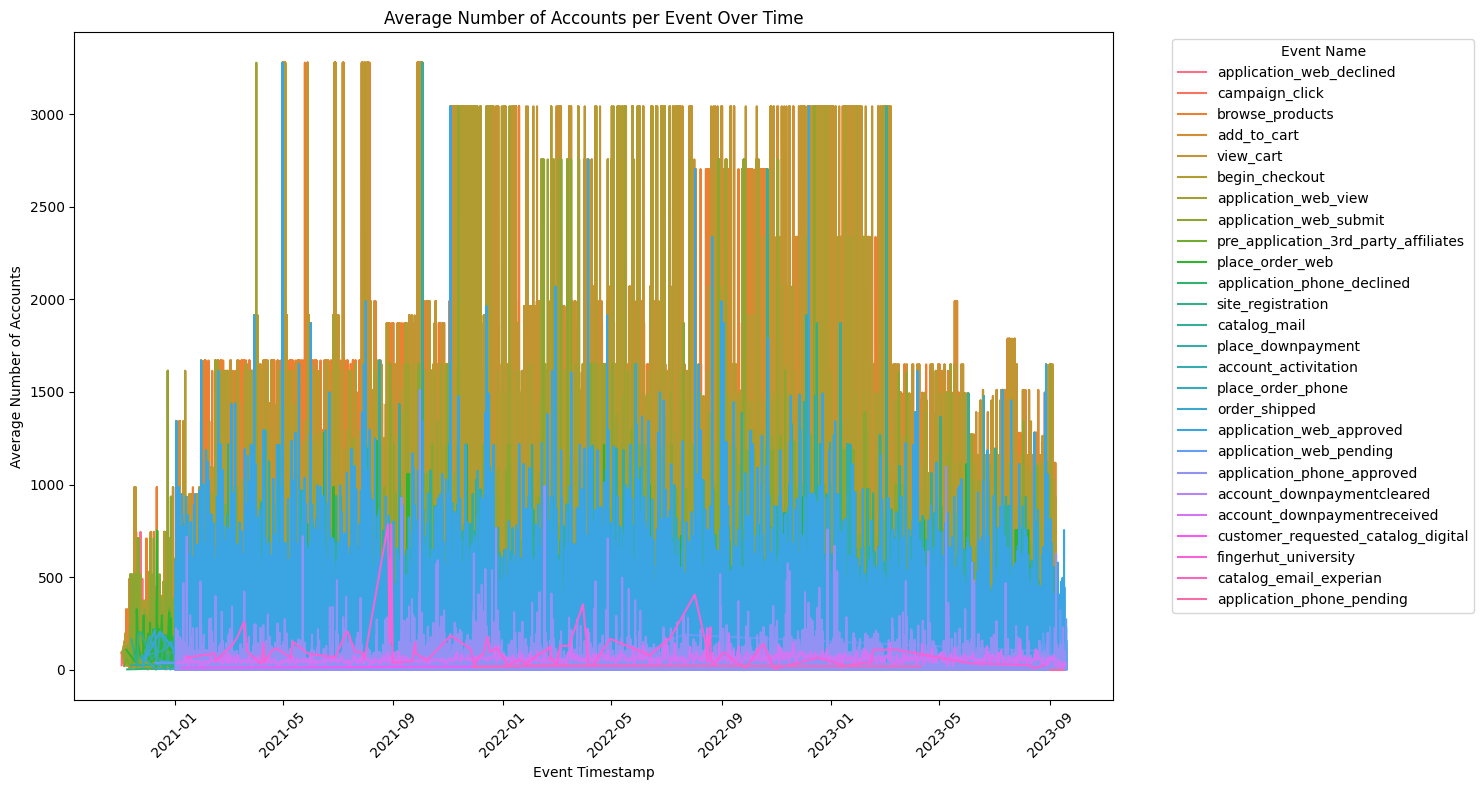

In [46]:
time_event_df = merged_with_counts.groupby(['event_timestamp', 'event_name']).agg({'n_accounts': 'mean'}).reset_index()

# Plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=time_event_df, x='event_timestamp', y='n_accounts', hue='event_name')

plt.title('Average Number of Accounts per Event Over Time')
plt.xlabel('Event Timestamp')
plt.ylabel('Average Number of Accounts')
plt.legend(title='Event Name', bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
del time_event_df

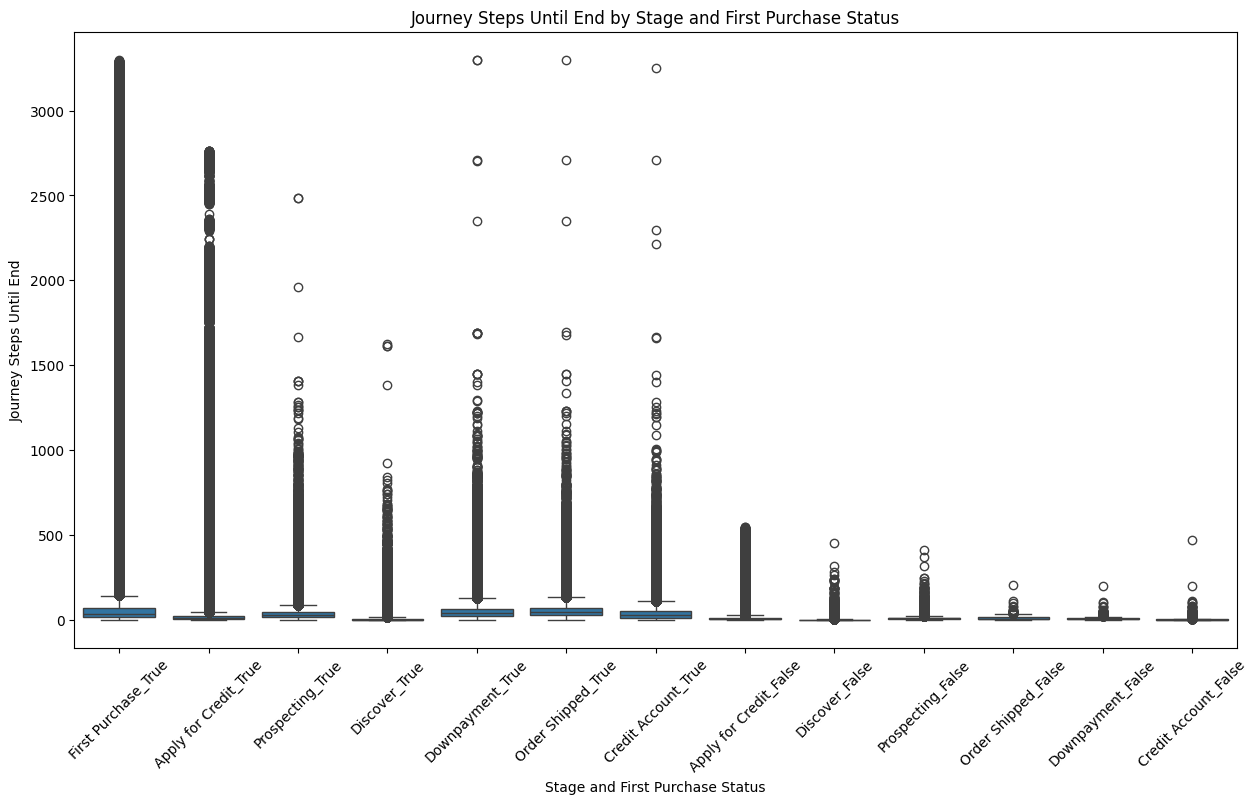

In [48]:
merged_with_counts['stage_purchase'] = merged_with_counts['stage'] + '_' + merged_with_counts['has_first_purchase'].astype(str)

# Plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=merged_with_counts, x='stage_purchase', y='journey_steps_until_end')

plt.title('Journey Steps Until End by Stage and First Purchase Status')
plt.xlabel('Stage and First Purchase Status')
plt.ylabel('Journey Steps Until End')
plt.xticks(rotation=45)
plt.show()

In [51]:
merged_with_counts.drop('stage_purchase',axis=1, inplace=True)

In [2]:
# Kernel died so I gotta reload the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

merged_with_counts = pd.read_csv('merged_with_purchase.csv')

In [9]:
merged_with_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56386082 entries, 0 to 56386081
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   customer_id              int64  
 2   account_id               int64  
 3   ed_id                    int64  
 4   event_timestamp          object 
 5   journey_steps_until_end  int64  
 6   event_name               object 
 7   journey_id               int64  
 8   milestone_number         float64
 9   stage                    object 
 10  n_accounts               int64  
 11  has_discover             bool   
 12  has_first_purchase       bool   
 13  lifespan                 object 
 14  time_to_purchase         object 
dtypes: bool(2), float64(1), int64(7), object(5)
memory usage: 5.6+ GB


In [14]:
merged_with_counts.head()

,customer_id,account_id,ed_id,event_timestamp,journey_steps_until_end,event_name,journey_id,milestone_number,stage,n_accounts,has_discover,has_first_purchase,lifespan,time_to_purchase
0,-2147483541,2059949086,11,2021-10-05 22:36:50+00:00,16,add_to_cart,1,NaN,First Purchase,20,False,True,131,0.0
1,-2147483541,2059949086,4,2021-10-05 22:36:31+00:00,15,browse_products,1,NaN,First Purchase,20,False,True,131,0.0
2,-2147483541,2059949086,5,2021-10-05 22:35:47+00:00,14,view_cart,1,NaN,First Purchase,20,False,True,131,0.0
3,-2147483541,2059949086,4,2021-10-05 22:33:47+00:00,10,browse_products,1,NaN,First Purchase,20,False,True,131,0.0
4,-2147483541,2059949086,4,2021-10-05 22:33:18+00:00,8,browse_products,1,NaN,First Purchase,20,False,True,131,0.0


In [8]:
merged_with_counts.columns

Index(['Unnamed: 0', 'customer_id', 'account_id', 'ed_id', 'event_timestamp',
       'journey_steps_until_end', 'event_name', 'journey_id',
       'milestone_number', 'stage', 'n_accounts', 'has_discover',
       'has_first_purchase', 'lifespan', 'time_to_purchase'],
      dtype='object')

In [52]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_with_counts, x='journey_steps_until_end', y='time_to_purchase', hue='stage', style='stage', alpha=0.7)

plt.title('Journey Steps Until End vs Time to First Purchase by Stage')
plt.xlabel('Journey Steps Until End')
plt.ylabel('Time to First Purchase (Days)')
plt.legend(title='Stage')
plt.show()

: 